###Máquina de soporte vectorial para clasificación

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.cross_validation import train_test_split
from sklearn.utils import column_or_1d
%matplotlib inline

#### 1) Se cargan el set de datos y se asigna el porcentaje de entrenamiento

In [4]:
data = pd.read_csv("andSVM.csv")
print(data.head())
print(data.describe())

   X1  X2  y
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1
4   2   3  1
              X1         X2          y
count  81.000000  81.000000  81.000000
mean    1.893407   1.889708   0.950617
std     0.508662   0.563512   0.218016
min     0.000000  -1.000000   0.000000
25%     1.686158   1.671415   1.000000
50%     1.963705   1.935736   1.000000
75%     2.252322   2.245784   1.000000
max     3.000000   3.000000   1.000000


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(data[["X1","X2"]],data[["y"]],train_size=0.75)
print len(X_train), len(X_test)

60 21


#### 2) Transformación de los datos

In [6]:
X_train1=np.asarray(X_train['X1'])
X_train2=np.asarray(X_train['X2'])

In [7]:
Y_train2 = column_or_1d(Y_train)

#### 3) Se define el kernel para el SVM y se ajusta el modelo

In [8]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

####4) Valores de coeficientes y cálculo del umbral de hyperplano

In [9]:
w = clf.coef_[0]
w0 = (clf.intercept_[0])
soporte = -w[0] / w[1]
x = np.linspace(-1, 3)
umbral = x * soporte - w0 / w[1]
print(w0, w, soporte, umbral)

(-1.9727452275390214, array([ 0.97304447,  0.97304449]), -0.99999998599334072, array([ 3.02739468,  2.94576202,  2.86412937,  2.78249672,  2.70086407,
        2.61923142,  2.53759876,  2.45596611,  2.37433346,  2.29270081,
        2.21106816,  2.1294355 ,  2.04780285,  1.9661702 ,  1.88453755,
        1.8029049 ,  1.72127225,  1.63963959,  1.55800694,  1.47637429,
        1.39474164,  1.31310899,  1.23147633,  1.14984368,  1.06821103,
        0.98657838,  0.90494573,  0.82331307,  0.74168042,  0.66004777,
        0.57841512,  0.49678247,  0.41514981,  0.33351716,  0.25188451,
        0.17025186,  0.08861921,  0.00698655, -0.0746461 , -0.15627875,
       -0.2379114 , -0.31954405, -0.4011767 , -0.48280936, -0.56444201,
       -0.64607466, -0.72770731, -0.80933996, -0.89097262, -0.97260527]))


In [10]:
clf.coef_[0]

array([ 0.97304447,  0.97304449])

In [11]:
soporte

-0.99999998599334072

#### 5) Visualización de clasificación multidimensional con SVM kernel lineal

In [15]:
soporte_down = clf.support_vectors_[0]
umbral_down = soporte * x + (soporte_down[1] - soporte * soporte_down[0])
soporte_up = clf.support_vectors_[-1]
umbral_up = soporte * x + (soporte_up[1] - soporte * soporte_up[0])

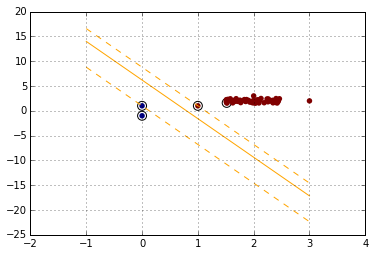

In [35]:
plt.plot(x, umbral, 'k-', color='orange')
plt.plot(x, umbral_down, 'k--', color='orange')
plt.plot(x, umbral_up, 'k--', color='orange')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X_train1,X_train2, c=Y_train2, edgecolors='none', s=30)
plt.grid()